In [1]:
%matplotlib notebook

In [2]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Pull CSV file and group data

In [3]:
# Read CSV file and show summary
game_data = pd.read_csv("Board-Games-Group-F.csv")
game_data.head()

,Unnamed: 0,id,name,year_published,min_players,max_players,primary_publisher,mechanics,num_user_ratings,average_user_rating,rank,num_mechs
0,0,oGVgRSAKwX,Carcassonne,2000,2.0,5.0,Hans im Glück,"['Tile Placement', 'Worker Placement']",548,3.436131,14,2
1,1,d7vHFjxM6M,Blokus,2000,2.0,4.0,Mattel Games,"['Area Enclosure', 'Hand Management', 'Tile Pl...",161,3.049689,221,3
2,2,uw69CrJFCL,Citadels: Classic,2000,2.0,8.0,Hans im Glück,"['Bluffing', 'Engine Building', 'Social Deduct...",133,3.308271,228,4
3,4,JyMsRC64I4,Go,2000,2.0,2.0,John N. Hansen Co.,['Area Enclosure'],82,3.329268,375,1
4,6,YD2fbRwJdz,Princes of Florence,2000,2.0,5.0,Rio Grande Games,['Tile Placement'],64,3.253385,487,1


In [4]:
# Group by year and display averages
yearly_average = game_data.groupby(["year_published"]).mean()
yearly_average

,Unnamed: 0,min_players,max_players,num_user_ratings,average_user_rating,rank,num_mechs
year_published,,,,,,,
2000,19.636364,2.000000,4.545455,60.409091,3.149334,4.545845e+06,2.500000
2001,112.125000,2.625000,5.375000,49.750000,3.053483,3.750502e+06,2.500000
2002,225.285714,2.371429,5.000000,29.600000,2.860864,6.857403e+06,3.085714
2003,329.516129,2.161290,4.419355,30.032258,2.981208,6.129331e+06,2.741935
2004,430.543478,2.195652,4.934783,54.760870,3.147092,5.217652e+06,3.152174
2005,531.788462,2.269231,5.326923,45.211538,3.145248,3.846607e+06,3.365385
2006,629.000000,2.111111,4.422222,30.888889,3.133318,5.111451e+06,3.177778
2007,740.218750,2.062500,4.859375,43.546875,3.101528,4.531618e+06,3.015625
2008,841.833333,2.133333,6.583333,52.400000,3.076880,6.000218e+06,3.216667


# Plot Average Number of Mechanics per Year

<IPython.core.display.Javascript object>


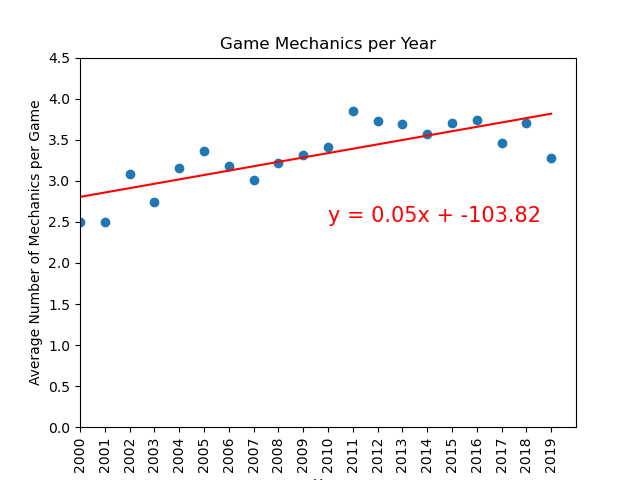

The r-value between both factors is 0.79.


In [5]:
# Determine tick locations and values
tick_locations = range(2000, 2020, 1)
x_values = range(2000, 2020, 1)
y_values = yearly_average['num_mechs']

# Determine r-value and linear regression line
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2010,2.5),fontsize=15,color="red")

# Add labels
plt.xticks(tick_locations, rotation='vertical')
plt.title('Game Mechanics per Year')
plt.xlabel('Year')
plt.ylabel('Average Number of Mechanics per Game')
plt.axis([2000,2020,0,4.5])
print(f"The r-value between both factors is {round(rvalue,2)}.")
plt.show()

In [6]:
# Save graph as png
plt.savefig("Images/GameMechanicsPerYearScatter.png")

# Run an ANOVA test on Mechanics per Year

<IPython.core.display.Javascript object>


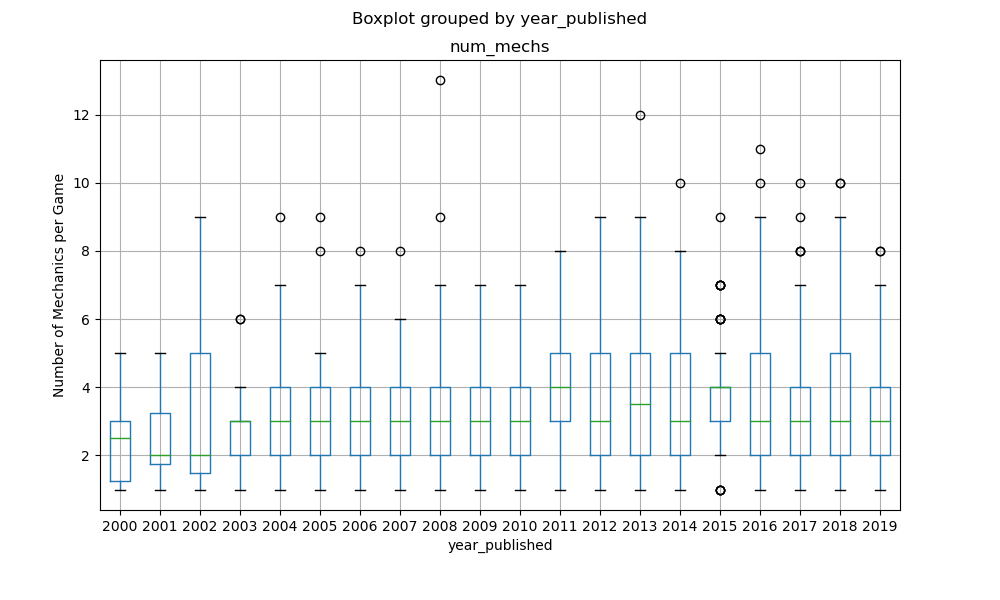

Text(0, 0.5, 'Number of Mechanics per Game')

In [7]:
# Create boxplot of number of mechanics per year
game_data.boxplot('num_mechs', by="year_published", figsize=(10,6))
plt.ylabel('Number of Mechanics per Game')

In [8]:
# Save graph as png
plt.savefig("Images/GameMechanicsPerYearBoxPlot.png")

In [9]:
# Extract individual groups
year_2000 = game_data[game_data["year_published"] == 2000]["num_mechs"]
year_2001 = game_data[game_data["year_published"] == 2001]["num_mechs"]
year_2002 = game_data[game_data["year_published"] == 2002]["num_mechs"]
year_2003 = game_data[game_data["year_published"] == 2003]["num_mechs"]
year_2004 = game_data[game_data["year_published"] == 2004]["num_mechs"]
year_2005 = game_data[game_data["year_published"] == 2005]["num_mechs"]
year_2006 = game_data[game_data["year_published"] == 2006]["num_mechs"]
year_2007 = game_data[game_data["year_published"] == 2007]["num_mechs"]
year_2008 = game_data[game_data["year_published"] == 2008]["num_mechs"]
year_2009 = game_data[game_data["year_published"] == 2009]["num_mechs"]
year_2010 = game_data[game_data["year_published"] == 2010]["num_mechs"]
year_2011 = game_data[game_data["year_published"] == 2011]["num_mechs"]
year_2012 = game_data[game_data["year_published"] == 2012]["num_mechs"]
year_2013 = game_data[game_data["year_published"] == 2013]["num_mechs"]
year_2014 = game_data[game_data["year_published"] == 2014]["num_mechs"]
year_2015 = game_data[game_data["year_published"] == 2015]["num_mechs"]
year_2016 = game_data[game_data["year_published"] == 2016]["num_mechs"]
year_2017 = game_data[game_data["year_published"] == 2017]["num_mechs"]
year_2018 = game_data[game_data["year_published"] == 2018]["num_mechs"]
year_2019 = game_data[game_data["year_published"] == 2019]["num_mechs"]

In [10]:
# Perform the ANOVA
stats.f_oneway(year_2000,
              year_2001,
              year_2002,
              year_2003,
              year_2004,
              year_2005,
              year_2006,
              year_2007,
              year_2008,
              year_2009,
              year_2010,
              year_2011,
              year_2012,
              year_2013,
              year_2014,
              year_2015,
              year_2016,
              year_2017,
              year_2018,
              year_2019)

F_onewayResult(statistic=2.0767084588701095, pvalue=0.004260503269707116)